<a href="https://colab.research.google.com/github/PranavShashidhara/ML-Models-Using-Pytorch/blob/main/Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train = x_scaler.fit_transform(x_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
x_test = x_scaler.transform(x_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))

In [4]:
#Converting to tensors for pytorch
x_train_t = torch.tensor(x_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
x_test_t = torch.tensor(x_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

model = nn.Linear(in_features=1, out_features=1)
optim = torch.optim.SGD(params=model.parameters(), lr = 0.01)
epochs = 500

losses = []
l = nn.MSELoss()
for epoch in range(epochs):
  model.train()
  optim.zero_grad()

  y_pred = model(x_train_t)
  loss = l(y_pred, y_train_t)
  loss.backward()
  optim.step()
  losses.append(loss)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 2.241487979888916
Epoch: 10 | Loss: 1.5852563381195068
Epoch: 20 | Loss: 1.147150993347168
Epoch: 30 | Loss: 0.8546682000160217
Epoch: 40 | Loss: 0.659404456615448
Epoch: 50 | Loss: 0.5290447473526001
Epoch: 60 | Loss: 0.44201555848121643
Epoch: 70 | Loss: 0.38391414284706116
Epoch: 80 | Loss: 0.3451252281665802
Epoch: 90 | Loss: 0.31922945380210876
Epoch: 100 | Loss: 0.3019412159919739
Epoch: 110 | Loss: 0.2903995215892792
Epoch: 120 | Loss: 0.28269410133361816
Epoch: 130 | Loss: 0.27754998207092285
Epoch: 140 | Loss: 0.2741156816482544
Epoch: 150 | Loss: 0.2718229293823242
Epoch: 160 | Loss: 0.2702923119068146
Epoch: 170 | Loss: 0.2692704200744629
Epoch: 180 | Loss: 0.26858818531036377
Epoch: 190 | Loss: 0.268132746219635
Epoch: 200 | Loss: 0.26782864332199097
Epoch: 210 | Loss: 0.26762568950653076
Epoch: 220 | Loss: 0.2674901485443115
Epoch: 230 | Loss: 0.2673996686935425
Epoch: 240 | Loss: 0.2673392593860626
Epoch: 250 | Loss: 0.26729893684387207
Epoch: 260 | Loss:

C:\Users\prana\AppData\Local\Temp\ipykernel_9888\1002725746.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.plot(x_test_t, torch.tensor(y_pred_test, dtype=torch.float32), color='red', label='Predicted')


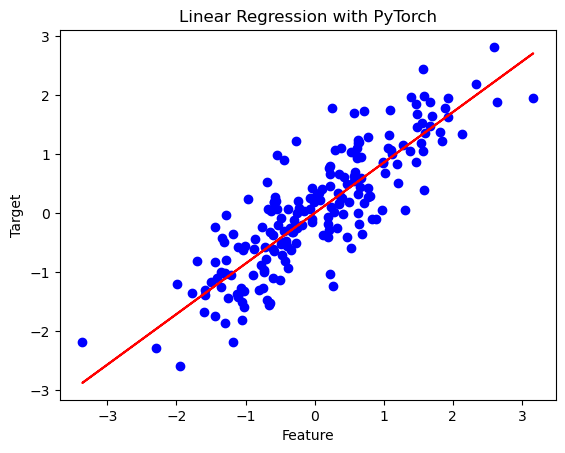

In [6]:
model.eval()
with torch.no_grad():
  y_pred_test = model(x_test_t)

plt.scatter(x_test_t, y_test, color='blue', label='Actual')
plt.plot(x_test_t, torch.tensor(y_pred_test, dtype=torch.float32), color='red', label='Predicted')
plt.title("Linear Regression with PyTorch")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

MSE: 0.30166443296504986


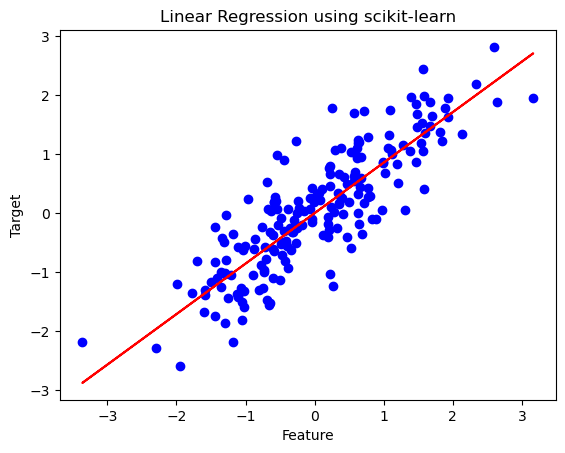

In [8]:
#Doing Linear Regression with Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
loss_scikit = mean_squared_error(y_test, y_pred)
print("MSE:", loss_scikit)
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.title("Linear Regression using scikit-learn")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()